In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Loading the data

In [3]:
df = pd.read_csv("METR-LA.csv")

### Print the data

In [ ]:

df.head()

,Time,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,3/1/2012 0:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,3/1/2012 0:05,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,3/1/2012 0:10,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,3/1/2012 0:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,3/1/2012 0:20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [12]:

df.columns

Index(['Time', '773869', '767541', '767542', '717447', '717446', '717445',
       '773062', '767620', '737529',
       ...
       '772167', '769372', '774204', '769806', '717590', '717592', '717595',
       '772168', '718141', '769373'],
      dtype='object', length=208)

In [45]:
sensor_data = df[["717447"]].copy()
df["Time"] = pd.to_datetime(df["Time"])
sensor_data.columns = ["Speed"]

In [46]:
sensor_data.head()

,Speed
0,61.500000
1,62.444444
2,59.000000
3,0.000000
4,0.000000


In [21]:
def convert_to_table(df, window_size=6):
    X, y = [], []
    speeds = df["Speed"].values
    for i in range(window_size, len(speeds)):
        X.append(speeds[i-window_size:i])
        y.append(speeds[i])
    return np.array(X), np.array(y)    

In [22]:
window_size = 6
X, y = convert_to_table(sensor_data, window_size)

print("Feature shape:", X.shape, "Feature type:", type(X))
print("Label shape:", y.shape, "Label type:", type(y))

Feature shape: (34265, 6) Feature type: <class 'numpy.ndarray'>
Label shape: (34265,) Label type: <class 'numpy.ndarray'>


In [23]:
m = X.shape[0]
train_end = int(m * 0.7)
val_end = int(m * 0.85)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

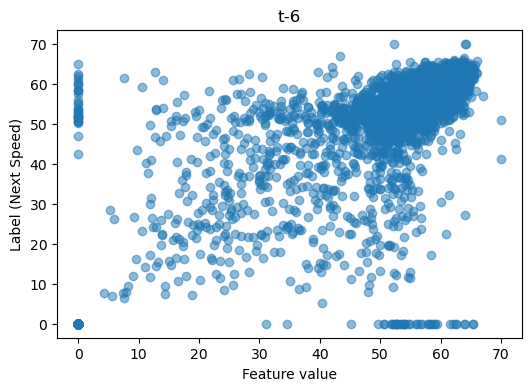

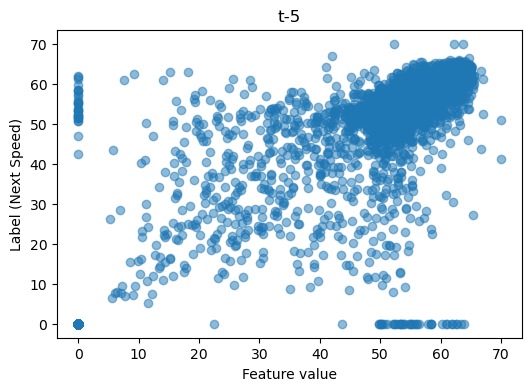

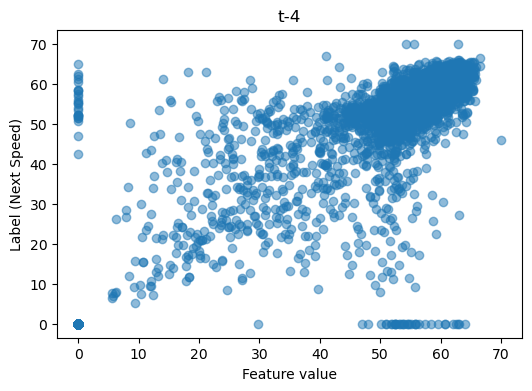

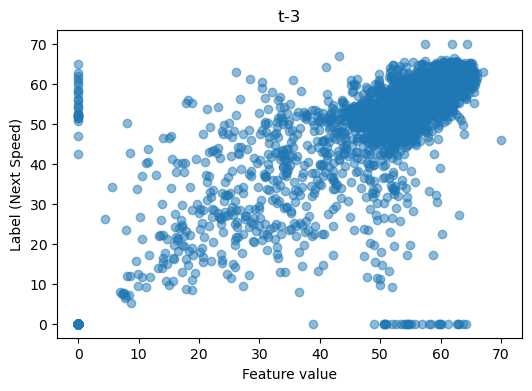

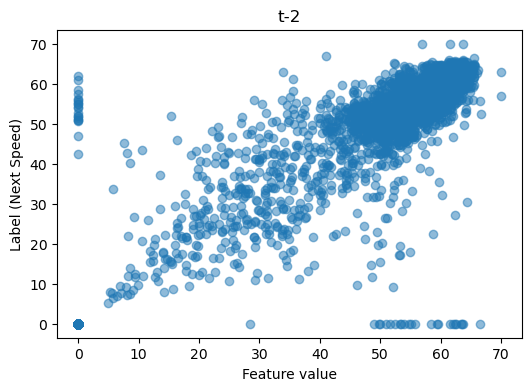

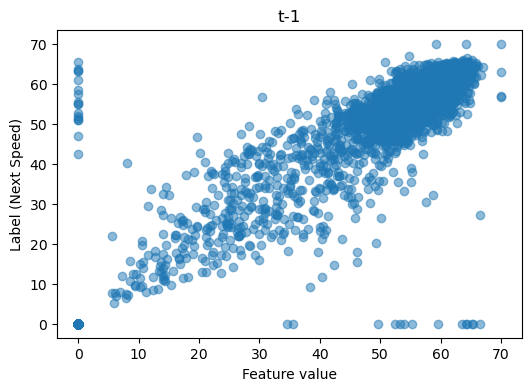

In [24]:
from utils import plot_features_vs_label


feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_train, y_train, feature_names=feature_names, sample_size=5000)


In [108]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[70. 70. 70. 70. 70. 70.]
Peak to Peak range by column in Normalized X:[4.63078601 4.63082936 4.63089103 4.63092145 4.63197904 4.63303884]


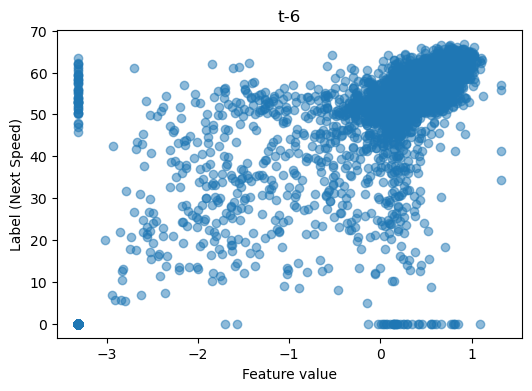

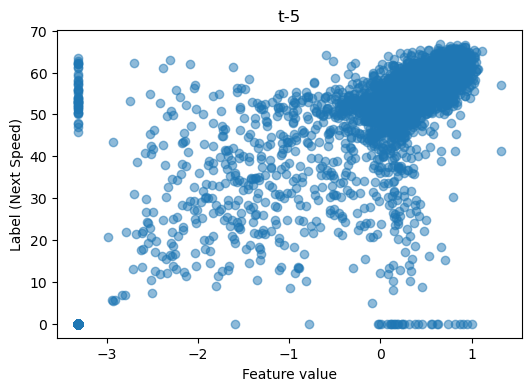

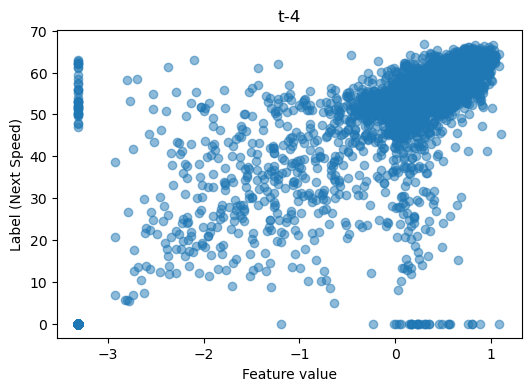

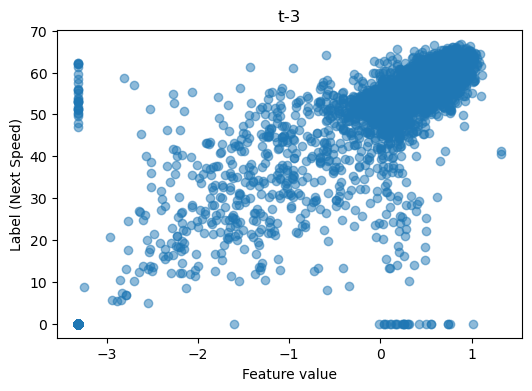

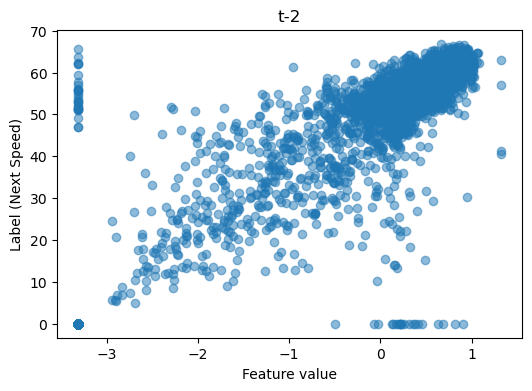

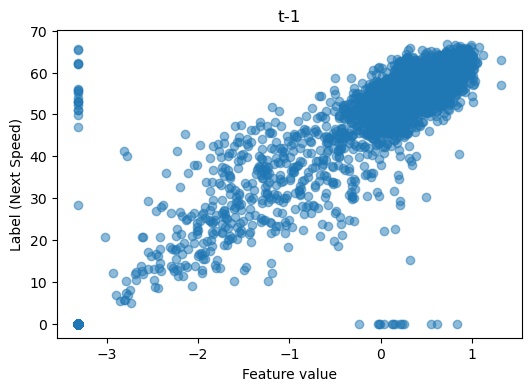

In [109]:
feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_norm, y_train, feature_names=feature_names, sample_size=5000)

In [174]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 10, number of weight updates: 239861.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [ 0.65194894  0.1586443   0.88340696  0.71999464  1.24050635 10.9304343 ], b:[50.06635331]


In [ ]:
y_pred = sgdr.predict(X_val_norm)

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_val[:4]}")

Prediction on training set:
[42.0604123  35.70341127 36.31125915 39.06755993]
Target values 
[28.25  31.125 36.75  35.25 ]


In [ ]:
mae = mean_absolute_error(y_val, y_pred)
print(f"MAE: {mae:.3f}")

MAE: 3.397


In [ ]:
r2 = r2_score(y_val, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.852


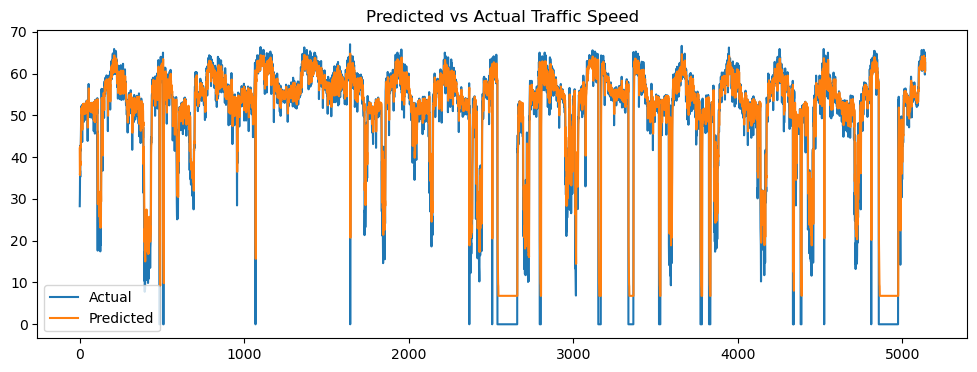

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(y_val, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()


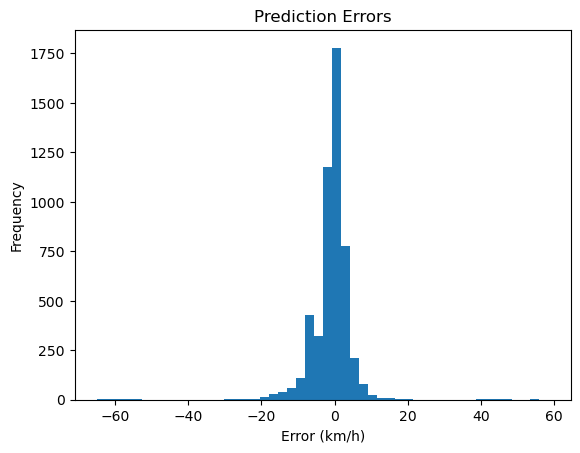

In [ ]:
errors = y_val - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()


In [181]:
y_pred = sgdr.predict(X_test_norm)
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

Prediction on training set:
[61.4330562  61.42288057 62.66445568 63.96406081]
Target values 
[62.375 60.5   63.    58.125]
MAE: 4.097
R²: 0.861


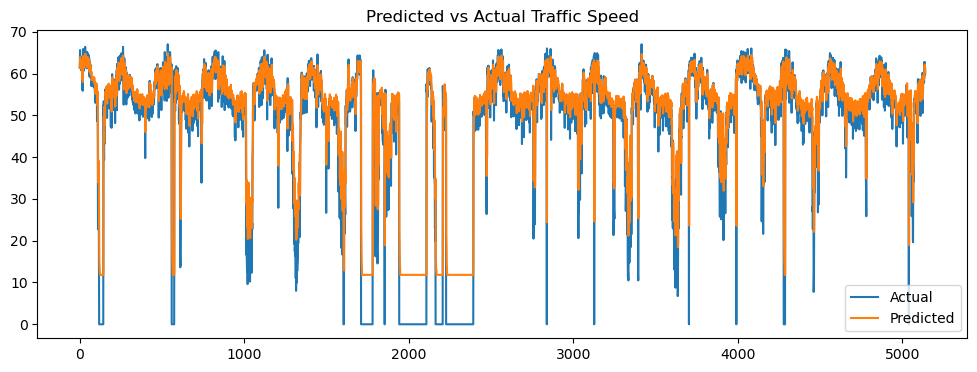

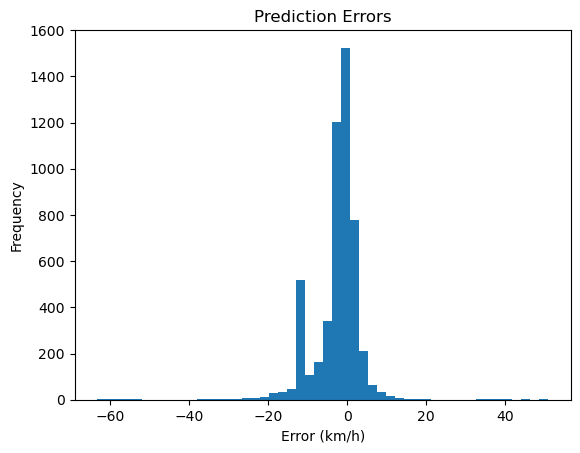

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()


### Adding the delta as a feature

In [47]:
sensor_data["delta_1"] = sensor_data["Speed"].diff(1)

sensor_data= sensor_data.dropna().reset_index(drop=True)

sensor_data.head()

,Speed,delta_1
0,62.444444,0.944444
1,59.000000,-3.444444
2,0.000000,-59.000000
3,0.000000,0.000000
4,61.666667,61.666667


In [48]:
def convert_to_table_with_extra_features(df, window_size=6):
    X, y = [], []
    speeds = df["Speed"].values
    delta_1 = df["delta_1"].values

    for i in range(window_size, len(speeds)):
        features = []

        features.extend(speeds[i-window_size:i])

        features.append(delta_1[i-1])


        X.append(features)
        y.append(speeds[i])

    return np.array(X), np.array(y)



In [49]:
window_size = 6
X_fe, y = convert_to_table_with_extra_features(sensor_data, window_size)

print("Feature shape:", X_fe.shape, "Feature type:", type(X_fe))
print("Label shape:", y.shape, "Label type:", type(y))

Feature shape: (34265, 7) Feature type: <class 'numpy.ndarray'>
Label shape: (34265,) Label type: <class 'numpy.ndarray'>


In [50]:
X_fe_train = X_fe[:train_end]
X_fe_val = X_fe[train_end:val_end]
X_fe_test = X_fe[val_end:]

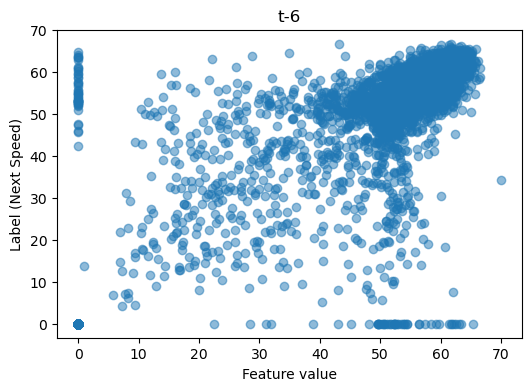

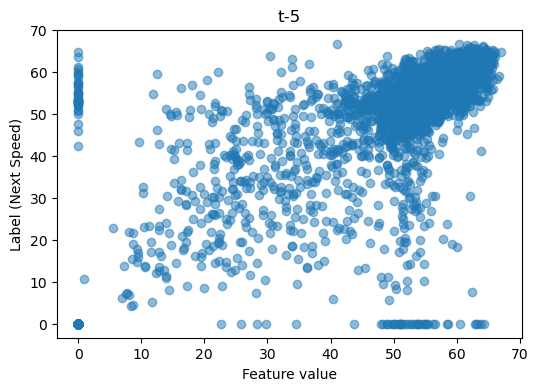

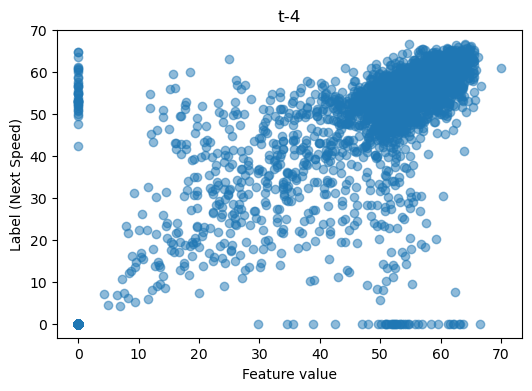

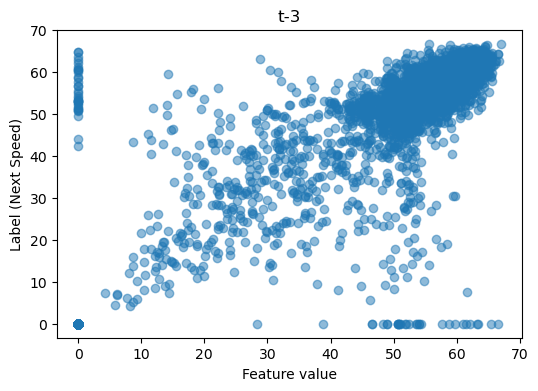

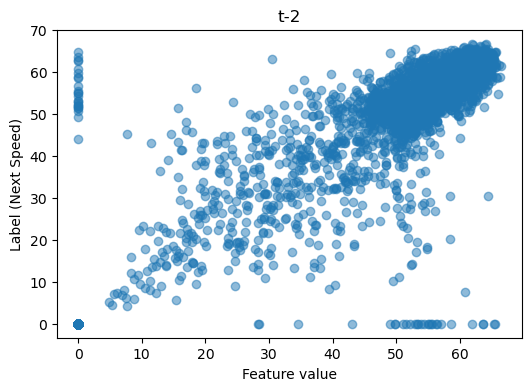

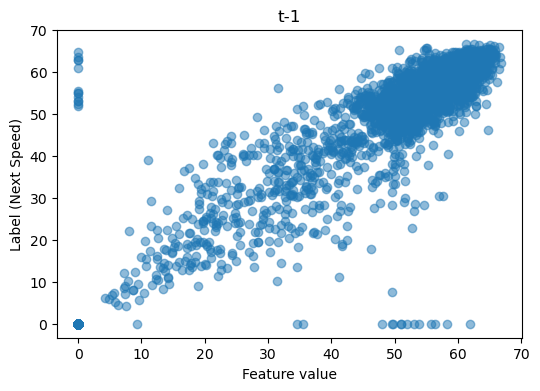

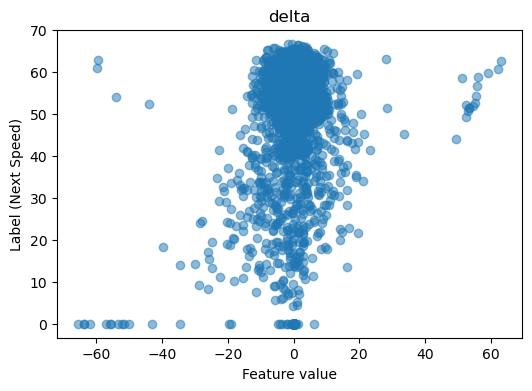

In [ ]:

feature_names = [f"t-{window_size-i}" for i in range(window_size)]
plot_features_vs_label(X_fe_train, y_train, feature_names=feature_names, sample_size=5000)


In [ ]:
scaler = StandardScaler()
X_fe_norm = scaler.fit_transform(X_fe_train)
X_fe_val_norm = scaler.fit_transform(X_fe_val)
X_fe_test_norm = scaler.fit_transform(X_fe_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_fe_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_fe_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 70.  70.  70.  70.  70.  70. 132.]
Peak to Peak range by column in Normalized X:[ 4.63074475  4.63079761  4.63082826  4.63188407  4.63294246  4.63299921
 21.93477016]


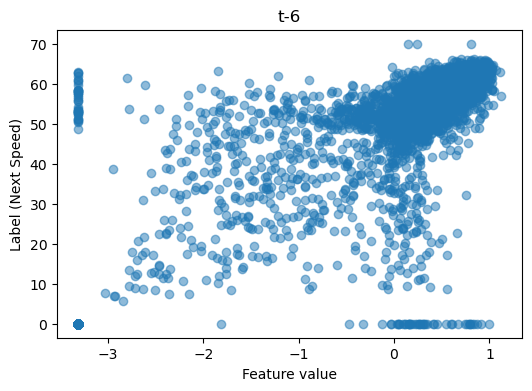

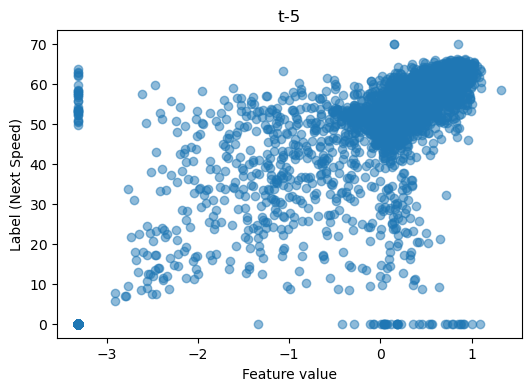

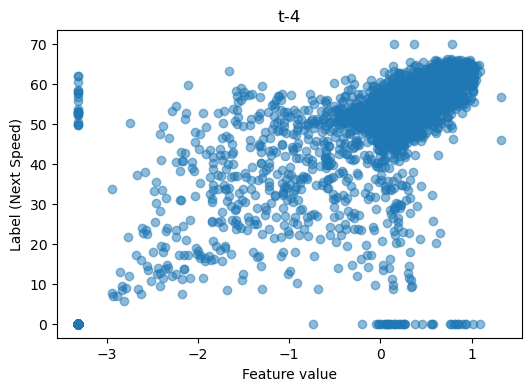

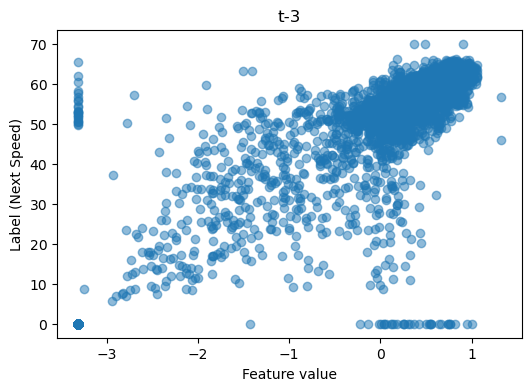

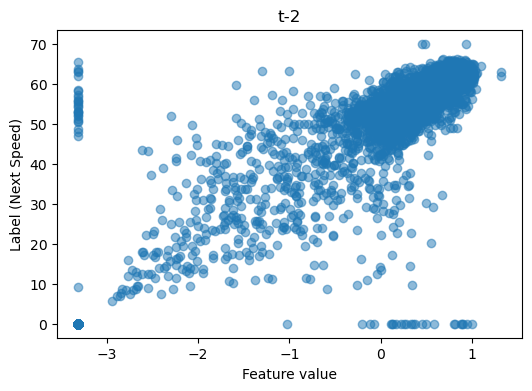

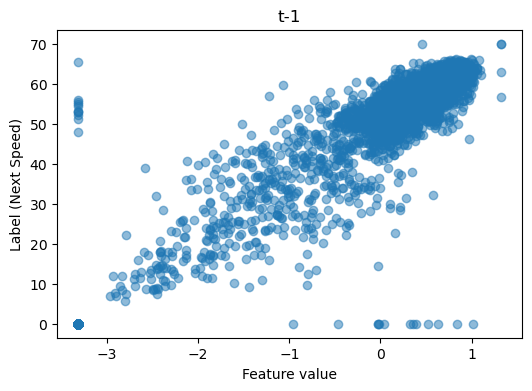

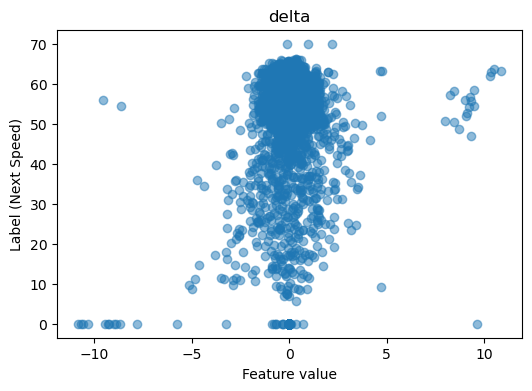

In [54]:
plot_features_vs_label(X_fe_norm, y_train, feature_names=feature_names, sample_size=5000)

In [82]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_fe_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 19, number of weight updates: 455716.0


In [83]:
b_fe_norm = sgdr.intercept_
w_fe_norm = sgdr.coef_
print(f"model parameters: w: {w_fe_norm}, b:{b_fe_norm}")

model parameters: w: [0.60551437 0.0231605  0.73858362 0.70963556 5.81574659 6.56856522
 1.88992351], b:[50.020574]


In [84]:
y_pred = sgdr.predict(X_fe_val_norm)

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_val[:4]}")

Prediction on training set:
[41.4765066  35.17441946 36.0481925  39.077272  ]
Target values 
[28.25  31.125 36.75  35.25 ]


In [85]:

mae = mean_absolute_error(y_val, y_pred)
print(f"MAE: {mae:.3f}")


MAE: 3.408


In [86]:
r2 = r2_score(y_val, y_pred)
print(f"R²: {r2:.3f}")

R²: 0.852


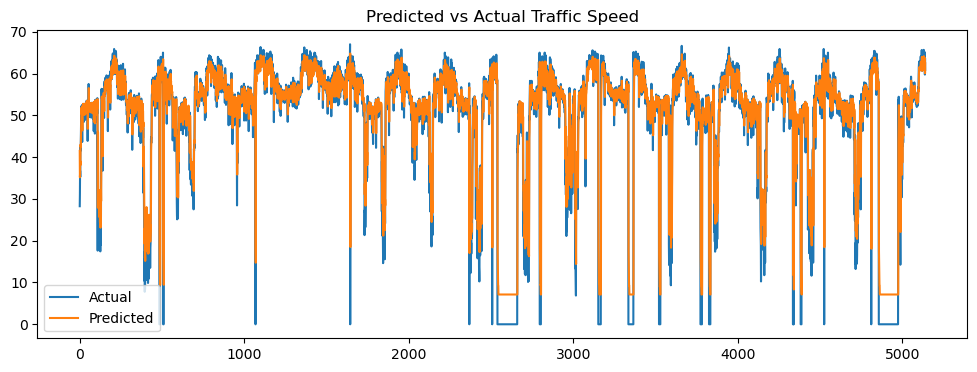

In [87]:
plt.figure(figsize=(12,4))
plt.plot(y_val, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

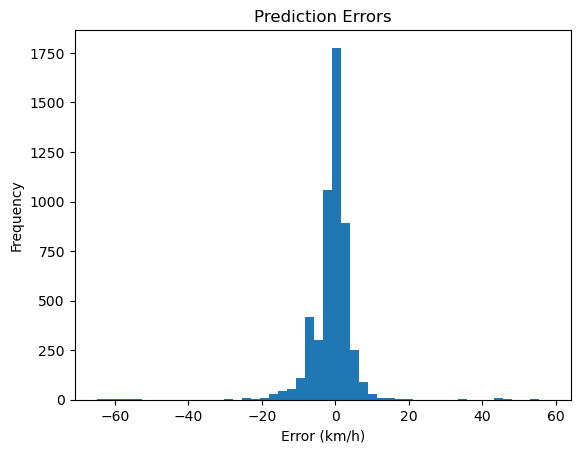

In [88]:
errors = y_val - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()

In [89]:
y_pred = sgdr.predict(X_fe_test_norm)
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")


Prediction on training set:
[61.02643659 61.31486535 62.66436491 64.05209628]
Target values 
[60.5        63.         58.125      61.11111111]
MAE: 4.126
R²: 0.860


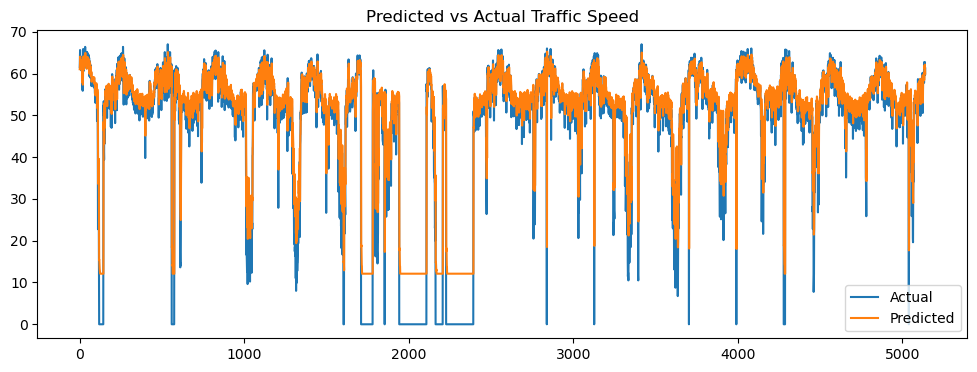

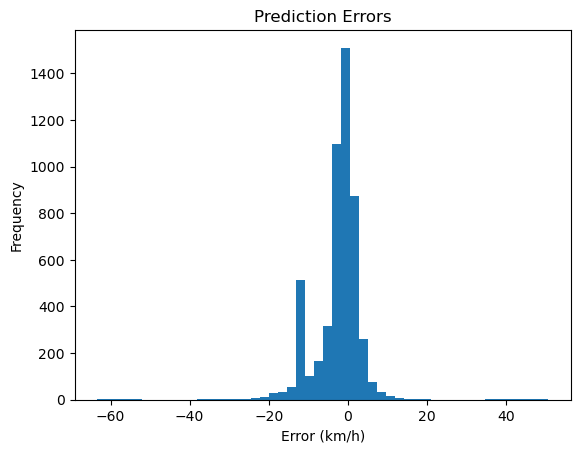

In [90]:
plt.figure(figsize=(12,4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()